In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)

In [6]:
file_path = "Advertising.csv"
df = pd.read_csv(file_path)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
df.shape

(200, 4)

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
X = df.drop('sales', axis=1)
y = df.sales

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [14]:
poly.fit(X)

PolynomialFeatures(include_bias=False)

In [15]:
poly_features = poly.transform(X)

In [16]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [17]:
poly_features.shape

(200, 9)

In [19]:
pd.DataFrame(poly_features, columns =  ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                       "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"])

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


In [20]:
X.shape

(200, 3)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
poly_model = LinearRegression()

In [27]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = poly_model.predict(X_test)

In [32]:
dic = {'Actual': y_test, 'Pred': y_pred, 'Residuals': y_test - y_pred}
com_dic = pd.DataFrame(dic)
com_dic.head()

,Actual,Pred,Residuals
95,16.9,17.254436,-0.354436
15,22.4,22.719332,-0.319332
30,21.4,20.427994,0.972006
158,7.3,7.542709,-0.242709
128,24.7,24.371030,0.328970


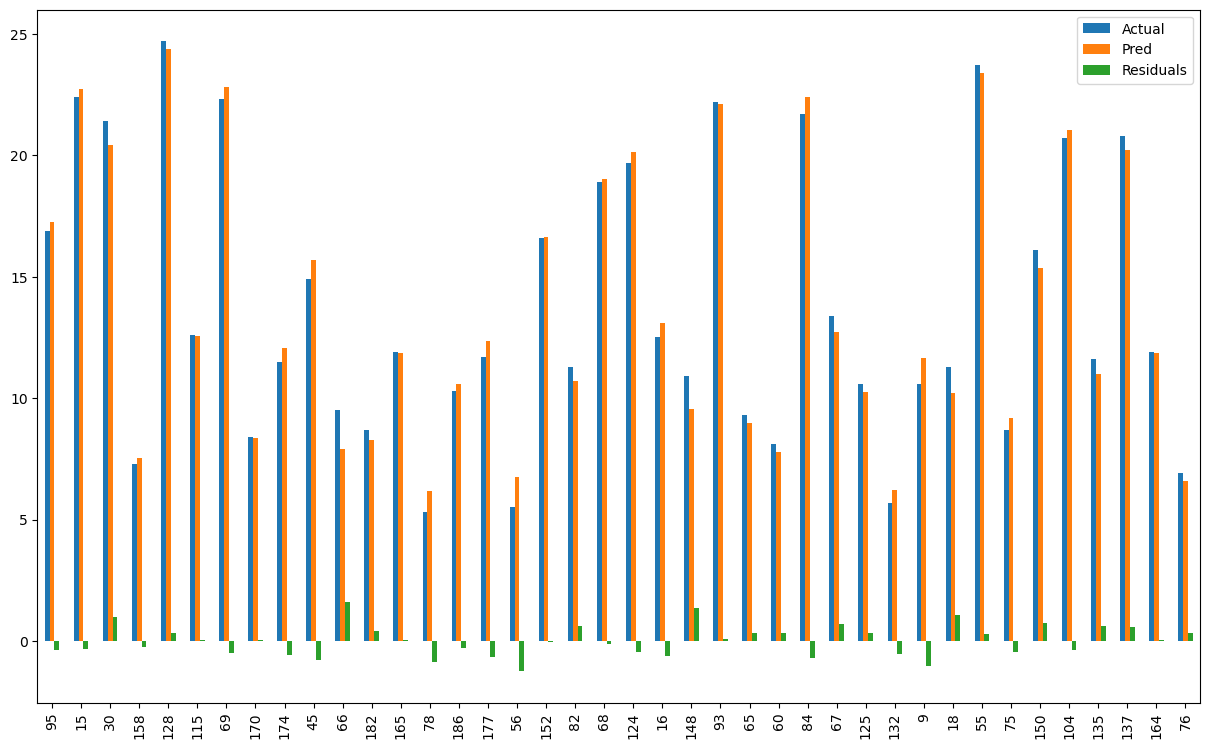

In [33]:
com_dic.plot(kind='bar', figsize = (15, 9))
plt.show()

In [34]:
#Seeing the coef of the poly model
poly_model.coef_

array([ 5.32356160e-02,  1.70980451e-02,  1.05807447e-02, -1.12286779e-04,
        1.11121741e-03, -7.37989541e-05,  1.32842962e-04,  1.24892479e-04,
        2.79665560e-05])

In [35]:
df_coef = pd.DataFrame(poly_model.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ['coef'])

In [36]:
df_coef

,coef
TV,0.053236
radio,0.017098
newspaper,0.010581
TV^2,-0.000112
TV&Radio,0.001111
TV&Newspaper,-0.000074
Radio^2,0.000133
Radio&newspaper,0.000125
Newspaper^2,0.000028


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
y_pred = poly_model.predict(X_test)

In [39]:
y_pred

array([17.25443578, 22.7193321 , 20.42799436,  7.542709  , 24.37103037,
       12.55927164, 22.80784986,  8.34371358, 12.0586023 , 15.69024565,
        7.89166367,  8.27082715, 11.86055971,  6.16591094, 10.57664393,
       12.3628954 ,  6.74390963, 16.65082111, 10.68661722, 19.03888161,
       20.15223945, 13.1137814 ,  9.56273868, 22.10675225,  8.96725241,
        7.7794437 , 22.40745151, 12.72065973, 10.25529986,  6.22368636,
       11.64677688, 10.22431946, 23.39763949,  9.17403232, 15.36143449,
       21.05675814, 10.9795286 , 20.23370753, 11.85153256,  6.58779915])

In [40]:
def eval_metric(actual, pred):
   
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

    return None

In [41]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score : 0.9869181490609605
MAE      : 0.5261794444043729
MSE      : 0.4129102285378985
RMSE     : 0.6425809120553602


In [42]:
y_train_pred = poly_model.predict(X_train)

In [43]:
y_train_pred

array([10.81928742, 12.83625921,  9.26610168,  9.07623877, 11.78754085,
        7.14971629, 10.04778138, 14.80251306, 10.19923236, 11.39077451,
       13.97418705, 12.16860064,  8.38091788,  7.37441402,  8.51323716,
       10.95087593, 10.05584997, 25.30662763,  6.98045361, 11.88397957,
       14.48611865, 15.67962067, 12.25108745,  8.82637717, 12.23636451,
        6.84451681, 20.48889038,  6.63899829, 10.89586451,  8.33512396,
       10.41551737,  8.53153635, 15.11645633, 18.23972862, 16.46625074,
       16.34919657, 15.57208057, 20.97410478, 12.16903339, 22.25084066,
        8.94026368, 14.21502123, 10.20105587, 17.71679692,  9.46363491,
       15.37282099, 13.36649617, 25.12537486,  9.67293513, 24.45285533,
        6.80461011, 19.64242267, 23.2076458 , 17.45323857, 17.39685344,
       17.11599529, 13.19771115, 10.68894265, 15.92493753, 15.20236389,
       13.2763202 ,  9.37362535, 20.04851225, 10.53333352, 19.3752879 ,
       11.13503014,  8.66885259, 15.54728525, 14.12674085, 13.27

In [44]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score : 0.986104518792419
MAE      : 0.4089721951355143
MSE      : 0.36039667447012214
RMSE     : 0.6003304710491731


In [45]:
def poly(d):

    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []

    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias = False)
        poly_features = polynomial_converter.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        
        number_of_features.append(poly_features.shape[1])

    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors,
                         "number of features":number_of_features}, index=range(1,d))

In [46]:
poly(7)

,train_rmse_errors,test_rmse_errors,number of features
1,1.644728,1.781600,3
2,0.600330,0.642581,9
3,0.464824,0.542742,19
4,0.368413,0.786099,34
5,0.250495,8.746573,55
6,0.205529,28.314983,83


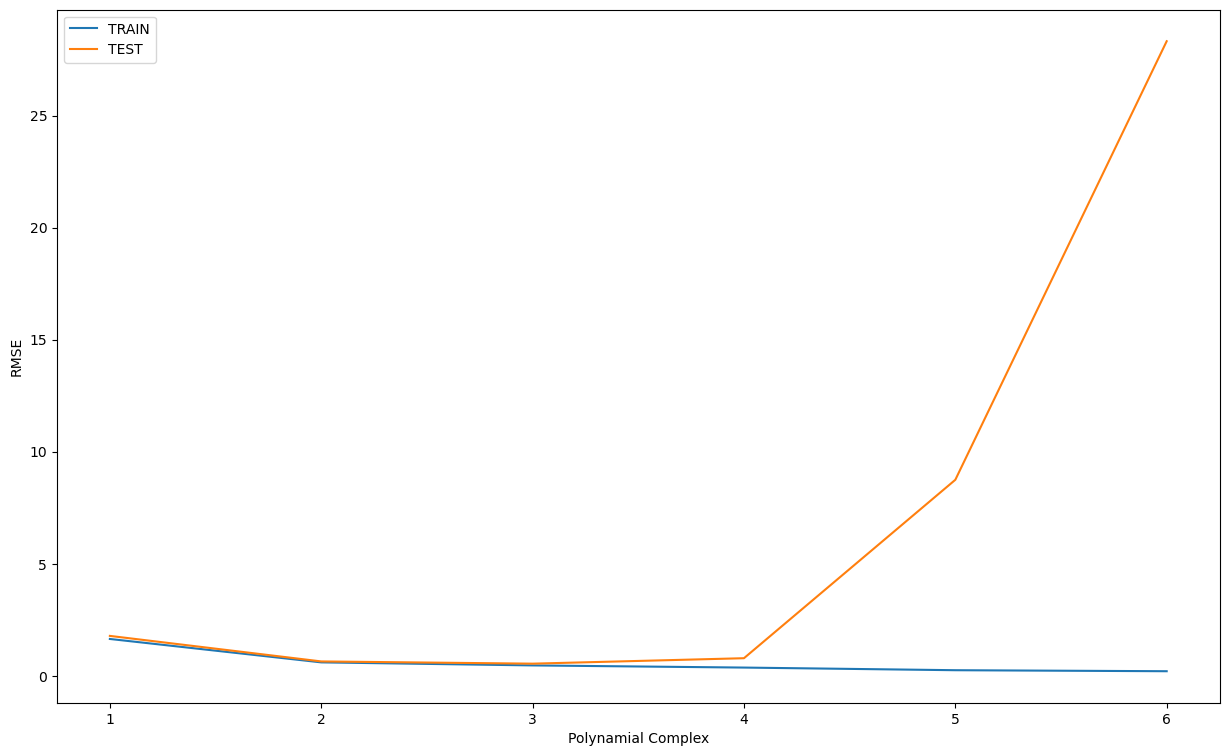

In [47]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

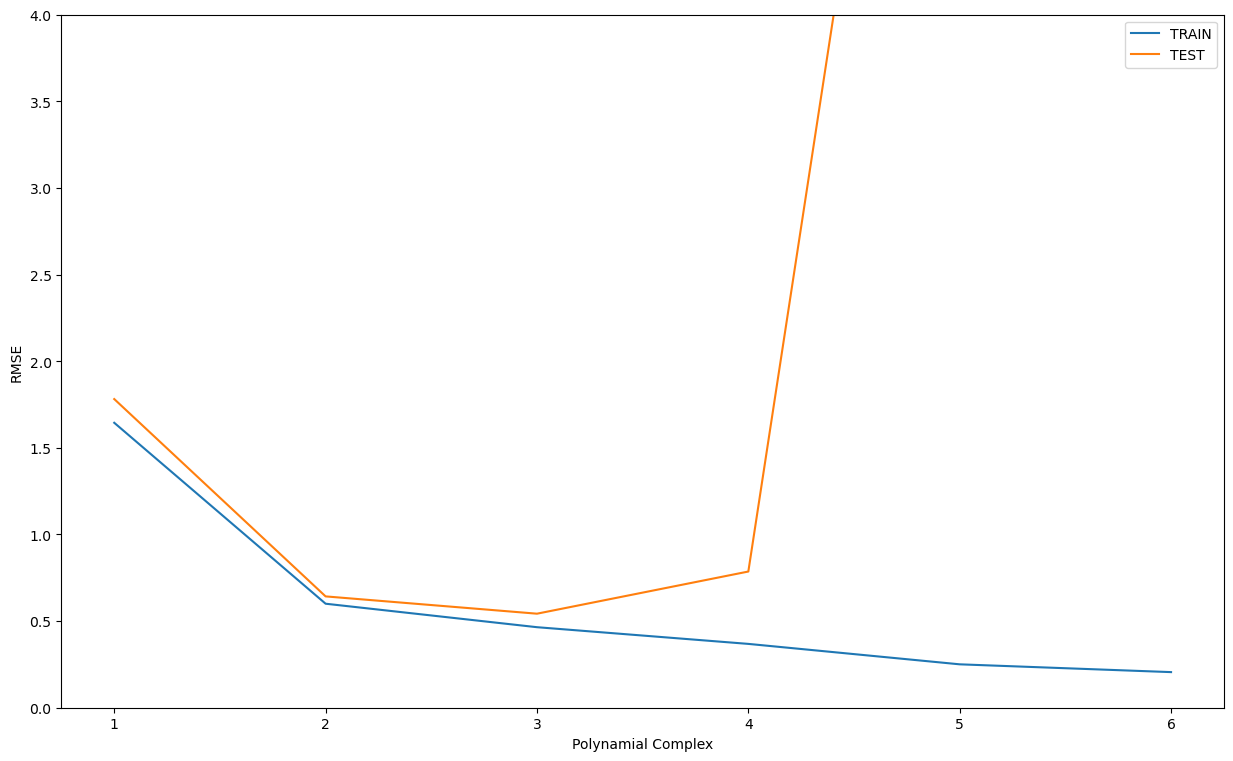

In [52]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label="TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label="TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.ylim(0,4)
plt.legend();

In [53]:
final_poly = PolynomialFeatures(degree=2, include_bias=False)

In [59]:
final_model = LinearRegression()

In [65]:
# poly_X = final_model.fit_transform(X)
poly_x = final_poly.fit_transform(X)  

In [68]:
final_model.fit(poly_x, y)

LinearRegression()

In [69]:
poly_x.shape

(200, 9)

In [82]:
new_record = [[180, 30, 5]]

In [83]:
new_record_poly = final_poly.transform(new_record)

C:\Users\habob\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [84]:
new_record_poly.shape

(1, 9)

In [85]:
final_model.predict(new_record_poly)

array([17.53545323])